In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def add_result(data, file):
    with open(file, 'r') as file:
        lines = file.readlines()
        second_last_line = lines[-2].strip()
        parts = second_last_line.split()
        if len(parts) >= 6 and parts[3].isdigit():
            jailbreaks = int(parts[3])
            if jailbreaks > 0:
                queries = int(parts[7])
                queries = min(queries, 2000)
                data.append(pd.DataFrame({'steps': [queries]}))

def load_data(folder_path):
    data = []
    for file in os.listdir(folder_path):
        if file.endswith('.log'):
            add_result(data, os.path.join(folder_path, file))
    return pd.concat(data)  

jb_data = load_data('../GPTFuzz/run_logs')
jb_eos_data = load_data('../GPTFuzz/run_logs_eos')


In [13]:
def calculate_success_rates(data, step_intervals):
    rates = []
    total = 128
    for step in step_intervals:
        successful = (data['steps'] <= step).sum() 
        rate = successful / total 
        rates.append(rate)
    return rates

step_intervals = range(0, 2001, 100)  # 0, 100, 200, ... 1000
gcg_rates = calculate_success_rates(jb_data, step_intervals)
gcg_eos_rates = calculate_success_rates(jb_eos_data, step_intervals)


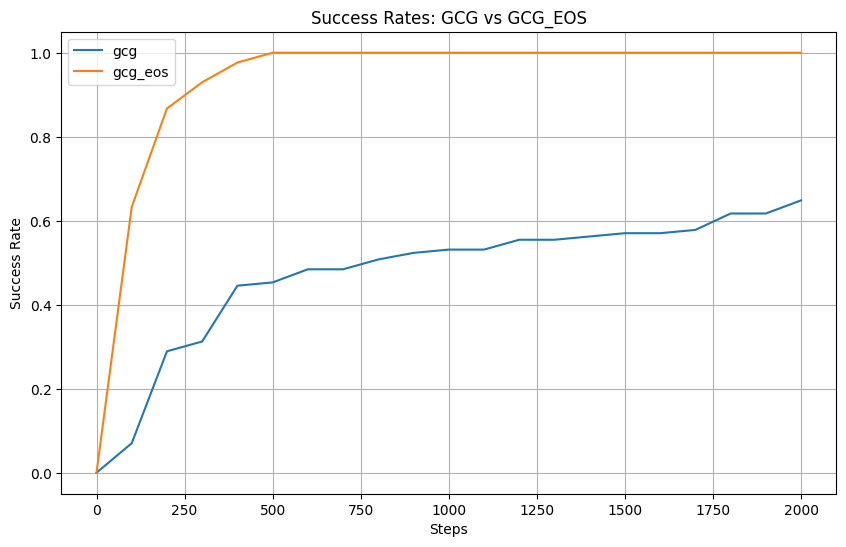

In [14]:
plt.figure(figsize=(10, 6)) 
plt.plot(step_intervals, gcg_rates, label='gcg')
plt.plot(step_intervals, gcg_eos_rates, label='gcg_eos')
plt.xlabel('Steps')
plt.ylabel('Success Rate')
plt.title('Success Rates: GCG vs GCG_EOS')
plt.legend()
plt.grid(True) 
plt.savefig('gcg_vs_gcg_eos.pdf')
plt.show()
